In [ ]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [ ]:
air=pd.read_csv("1680414010airlinepassengers.csv",parse_dates=True,index_col='Month')

In [ ]:
air.head()

,Thousands of Passengers
Month,
1949-01,112.0
1949-02,118.0
1949-03,132.0
1949-04,129.0
1949-05,121.0


In [ ]:
air.shape

(145, 1)

# Basic Eda

In [ ]:
air.info()

<class 'pandas.core.frame.DataFrame'>
Index: 145 entries, 1949-01 to International airline passengers: monthly totals in thousands. Jan 49 ? Dec 60
Data columns (total 1 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Thousands of Passengers  144 non-null    float64
dtypes: float64(1)
memory usage: 2.3+ KB


In [ ]:
air.describe()

,Thousands of Passengers
count,144.000000
mean,280.298611
std,119.966317
min,104.000000
25%,180.000000
50%,265.500000
75%,360.500000
max,622.000000


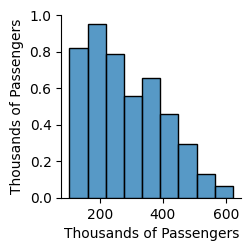

In [ ]:
sns.pairplot(air)

<Axes: >

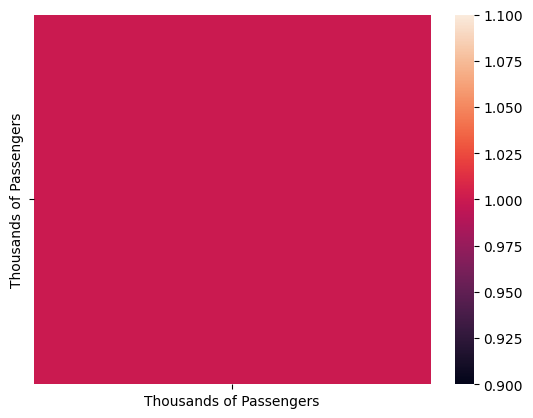

In [ ]:
sns.heatmap(air.corr())

In [ ]:
air.isnull()

,Thousands of Passengers
Month,
1949-01,False
1949-02,False
1949-03,False
1949-04,False
1949-05,False
...,...
1960-09,False
1960-10,False
1960-11,False


In [ ]:
air.isnull().sum()

Thousands of Passengers    1
dtype: int64

<Axes: ylabel='Month'>

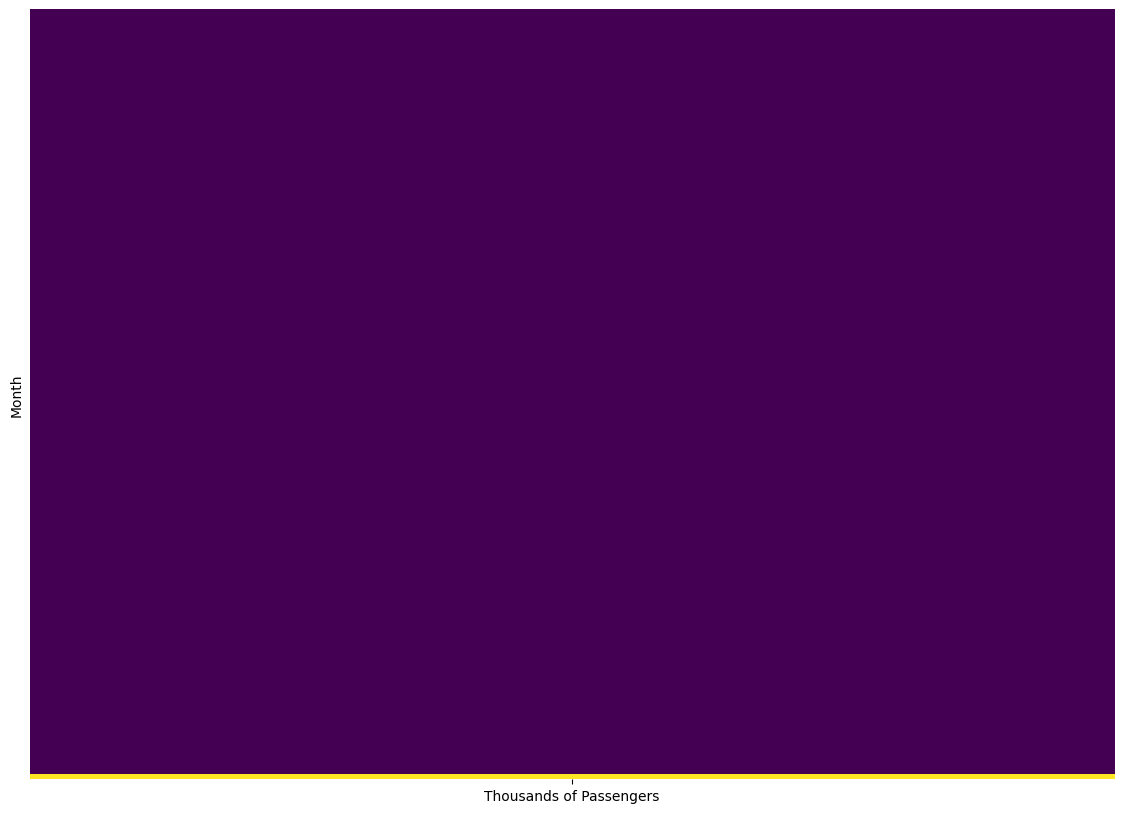

In [ ]:
#visualization of missing values using seaborn library
plt.figure(figsize=(14,10))
sns.heatmap(air.isnull(),yticklabels=False,cbar=False,cmap="viridis")

In [ ]:
#Clean the data
air.dropna(axis=0,inplace=True)

In [ ]:
air.isnull()

,Thousands of Passengers
Month,
1949-01,False
1949-02,False
1949-03,False
1949-04,False
1949-05,False
...,...
1960-08,False
1960-09,False
1960-10,False


In [ ]:
air.head()

,Thousands of Passengers
Month,
1949-01,112.0
1949-02,118.0
1949-03,132.0
1949-04,129.0
1949-05,121.0


In [ ]:
air.head()

,Thousands of Passengers
Month,
1949-01,112.0
1949-02,118.0
1949-03,132.0
1949-04,129.0
1949-05,121.0


Text(0.5, 1.0, 'airline_passengers')

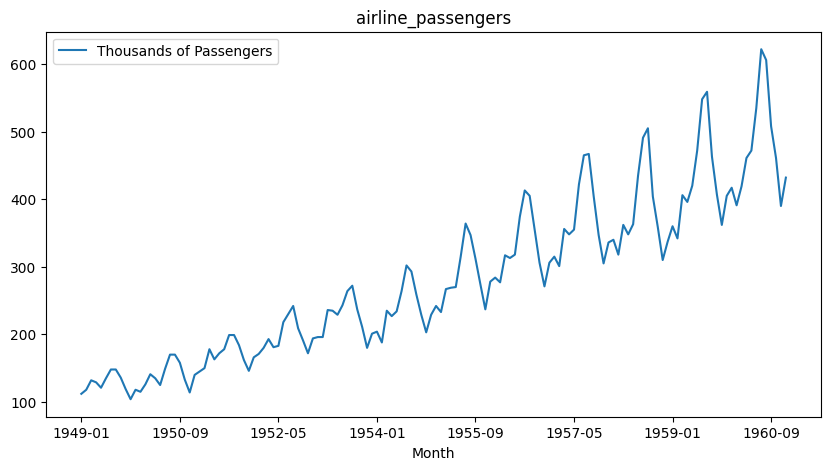

In [ ]:
air.plot(figsize=(10,5))
plt.title("airline_passengers")

In [ ]:
alpha=0.2
air["EWMA"]=air["Thousands of Passengers"].ewm(alpha=alpha,adjust=False).mean()

#As you can see the exponentially weighted moving average is kind of like a delayed and adaptive version of original data set similar to the simple moving average.

Text(0.5, 1.0, 'EWMA')

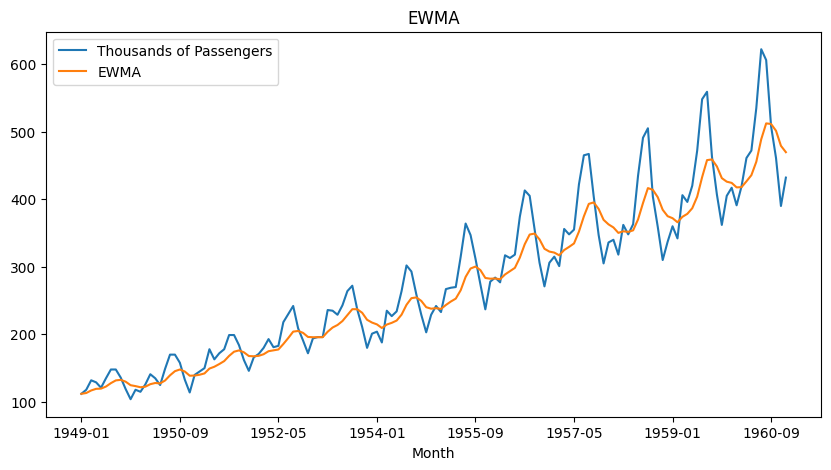

In [ ]:
air.plot(figsize=(10,5))
plt.title("EWMA")

#SIMPLE EXPONENTIAL SMOOTHING

#In this part, I am going to implement simple exponential smoothing in code and this is the same operation as the exponentially weighted moving average.

In [ ]:
from statsmodels.tsa.holtwinters import SimpleExpSmoothing
ses=SimpleExpSmoothing(air["Thousands of Passengers"])

/usr/local/lib/python3.9/dist-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)


#We have to assign a frequency to the index

#Calendar month begin

In [ ]:
air.index.freq="MS"

In [ ]:
air.dropna()

,Thousands of Passengers,EWMA
Month,,
1949-01,112.0,112.000000
1949-02,118.0,113.200000
1949-03,132.0,116.960000
1949-04,129.0,119.368000
1949-05,121.0,119.694400
...,...,...
1960-08,606.0,512.214093
1960-09,508.0,511.371274
1960-10,461.0,501.297019


In [ ]:
ses=SimpleExpSmoothing(air["Thousands of Passengers"], initialization_method="legacy-heuristic")

/usr/local/lib/python3.9/dist-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)


In [ ]:
res=ses.fit(smoothing_level=alpha, optimized=False)
res

In [ ]:
res.predict(start=air.index[0], end=air.index[-1])
air["SES"]= res.predict(start=air.index[0], end=air.index[-1])

#The results from SES model are different from pandas. They seem to be shifted by one

Text(0.5, 1.0, 'SimpleExpSmoothing')

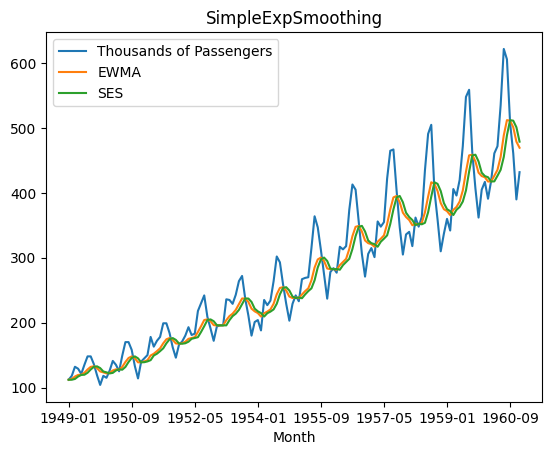

In [ ]:
import numpy as np
np.allclose(air["SES"], res.fittedvalues)
air.plot()
plt.title("SimpleExpSmoothing")

#It looks like SES need to be shifted

In [ ]:
air.head()

,Thousands of Passengers,EWMA,SES
Month,,,
1949-01,112.0,112.0000,112.000
1949-02,118.0,113.2000,112.000
1949-03,132.0,116.9600,113.200
1949-04,129.0,119.3680,116.960
1949-05,121.0,119.6944,119.368


In [ ]:
air["SES-1"]=air["SES"].shift(-1)

#The values line up as suspected.

<Axes: xlabel='Month'>

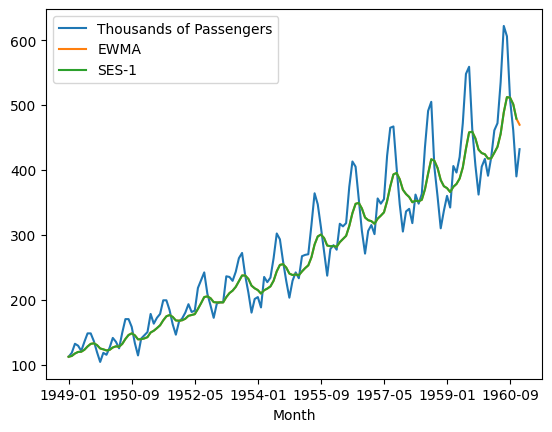

In [ ]:
air[["Thousands of Passengers", "EWMA", "SES-1"]].plot()

In [ ]:
air.tail()

,Thousands of Passengers,EWMA,SES,SES-1
Month,,,,
1960-08,606.0,512.214093,488.767616,512.214093
1960-09,508.0,511.371274,512.214093,511.371274
1960-10,461.0,501.297019,511.371274,501.297019
1960-11,390.0,479.037615,501.297019,479.037615
1960-12,432.0,469.630092,479.037615,NaN


/usr/local/lib/python3.9/dist-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)


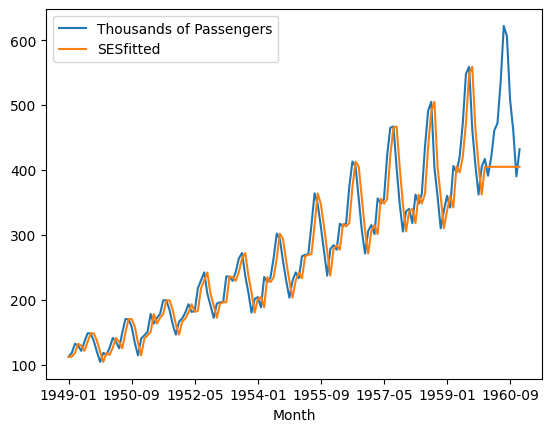

In [ ]:
N_test=12
train=air.iloc[:-N_test]
test=air.iloc[-N_test:]

air.index.freq="MS"

ses=SimpleExpSmoothing(
    train["Thousands of Passengers"],
    initialization_method="legacy-heuristic")
res=ses.fit()

train_idx=air.index<=train.index[-1]
test_idx=air.index>train.index[-1]

air.loc[train_idx,"SESfitted"]=res.fittedvalues
air.loc[test_idx,"SESfitted"]=res.forecast(N_test)
air[["Thousands of Passengers","SESfitted"]].plot()
plt.show()